## Conhecendo melhor nossa base de consumidores: qual estado possui os clientes com melhores pontuações de crédito?

### Objetivo
Queremos conhecer melhor nossos clientes por estado. Para isso, iniciamos uma análise na pontuação de crédito. Para realizar a verificação inicial, precisamos de alguns valores. Os valores são a média, a mediana, a moda e o desvio padrão da pontuação de crédito.

### Tópicos
Neste desafio você aprenderá:

- Média;
- Mediana;
- Moda;
- Desvio padrão.

### Requisitos

**Você precisará de python 3.6 (ou superior).**


### Descrição dos dados:

* ‘id’: Identificador do cliente 
* ‘sobrenome’: Sobrenome do cliente 
* ‘pontuacao_credito’: Pontuação de crédito do cliente (quanto maior, melhor o cliente geralmente) 
* ‘estado_residencia’: Estado de residência do cliente
* ‘genero’: Gênero do cliente 
* ‘nivel_estabilidade’: Nível de estabilidade do cliente 
* ‘saldo_conta’: Saldo disponível na conta do cliente 
* ‘numero_produtos’: Número de produtos que o cliente consome 
* ‘possui_cartao_de_credito’: Possui um cartão de crédito cadastrado
* ‘membro_ativo’: Membro acessa e consome frequentemente

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

%matplotlib inline  

In [3]:
# leitura do dataset
df = pd.read_csv("desafio1.csv", delimiter=",")

In [4]:
df.head(8)

,RowNumber,id,sobrenome,pontuacao_credito,estado_residencia,genero,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
0,1,e7f44fcbd380d4cef7e6c232cc7e37895c3fd197,6d6e0aa1b9b413e442e2fb68df14b4fc3f91de50,619,SC,F,42,2,0.00,1,1,1
1,2,28dcb083ad90512da16b9430085c2cddb8ca5e12,48e1ad846796fa314f1b4a6702b83343eb5482c5,608,RS,F,41,1,83807.86,1,0,1
2,3,774bc378f787438c9c7594e536787d07a097a54b,f2b29d5d934de615812b697132e767dea0f1e9e2,502,SC,F,42,8,159660.80,3,1,0
3,4,043a71326f7096de155e7f0c559dc62b5e4b7239,85d5c9da7cddd8109ad32a6c348fe2bb10bf99f2,699,SC,F,39,1,0.00,2,0,0
4,5,37b3bb8ca243955fb3605ec7e1c2a4607cdb3b22,ddc89c837a6933639de75f28171057060bd322df,850,RS,F,43,2,125510.82,1,1,1
5,6,db5cf32c3fbc7c5d8f8313afca1d099de6dc055f,a596384ca70664af4c5fac9f935cff186b8e8bc0,645,RS,M,44,8,113755.78,2,1,0
6,7,8f3cc64a0a84bab38fefb030f09757d0cbf03bb2,abec3e525ab40e45975c91d4fa2bc7b318d93de4,822,SC,M,50,7,0.00,2,1,1
7,8,6704b822c203e2dda9f225dfc4f1bed2ae9044e6,336b42483e6a17f48eb040a251b5d6e64d1351a9,376,PR,F,29,4,115046.74,4,1,0


In [5]:
# verifica se existem dados faltantes
df.isna().sum()

RowNumber                   0
id                          0
sobrenome                   0
pontuacao_credito           0
estado_residencia           0
genero                      0
idade                       0
nivel_estabilidade          0
saldo_conta                 0
numero_produtos             0
possui_cartao_de_credito    0
membro_ativo                0
dtype: int64

In [6]:
gp =df.groupby('estado_residencia').agg({'pontuacao_credito':['mean','median','std']})
gp = gp.reset_index()
gp.columns = ["estado_residencia","media","mediana","desvio_padrao"]
gp

,estado_residencia,media,mediana,desvio_padrao
0,PR,648.961294,650,98.607186
1,RS,651.105143,650,95.136598
2,SC,649.537653,653,97.233493


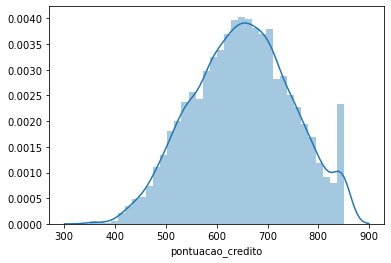

In [7]:
sns.distplot(df["pontuacao_credito"])
plt.show()

In [13]:
# obtém a moda da pontuacao de credito por estado
gp_mode = df.groupby('estado_residencia').pontuacao_credito.apply(lambda x: x.mode())
gp_mode = pd.DataFrame(gp_mode)
gp_mode.columns = ["moda"]
gp_mode

,,moda
estado_residencia,,
PR,0,850
RS,0,850
SC,0,850


In [23]:
# realiza inner join dos dois dataframes
gp_final = pd.merge(left=gp, right=gp_mode, left_on='estado_residencia', right_on='estado_residencia')

gp_final.set_index("estado_residencia",inplace=True)
gp_final

,media,mediana,desvio_padrao,moda
estado_residencia,,,,
PR,648.961294,650,98.607186,850
RS,651.105143,650,95.136598,850
SC,649.537653,653,97.233493,850


In [24]:
# calcula a transposta do dataframe
gp_final = gp_final.T
gp_final

estado_residencia,PR,RS,SC
media,648.961294,651.105143,649.537653
mediana,650.000000,650.000000,653.000000
desvio_padrao,98.607186,95.136598,97.233493
moda,850.000000,850.000000,850.000000


In [25]:
# converte dataframe para formato JSON
my_json = gp_final.to_json()
my_json

'{"PR":{"media":648.9612940497,"mediana":650.0,"desvio_padrao":98.6071859131,"moda":850.0},"RS":{"media":651.1051428571,"mediana":650.0,"desvio_padrao":95.1365984138,"moda":850.0},"SC":{"media":649.5376527423,"mediana":653.0,"desvio_padrao":97.2334927934,"moda":850.0}}'

In [26]:
# salva arquivo JSON
gp_final.to_json("teste.json")